In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Check columns in 'measurement' table
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Check columns in 'station' table    
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

Query Date:  2016-08-23


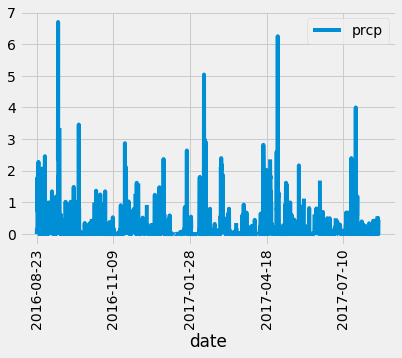

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the date and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    order_by(Measurement.date).all()
date_prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(date_prcp)
df = date_prcp_df.set_index(['date'])

# Sort the dataframe by date
df = df.sort_values(by=['date'])


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot = 90)
plt.show()



In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
stations_total = session.query(Station.id).count() 
print(f'There are a total of {stations_total} stations.')

There are a total of 9 stations.


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

# GroupBy
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# get the active station id from above and do func.min(Measurement.tobs), func.max, func.avg
min_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
# max_temp
max_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
# avg_temp 
avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(f'Lowest temp recorded is {min_temp}')
print(f'Highest temp recorded is {max_temp}')
print(f'Average temp is {avg_temp}')



Lowest temp recorded is [(54.0,)]
Highest temp recorded is [(85.0,)]
Average temp is [(71.66378066378067,)]


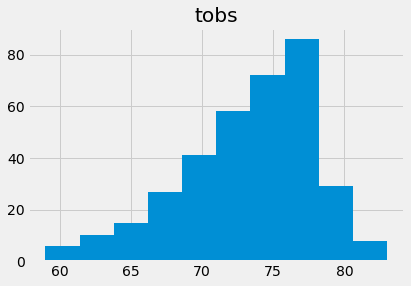

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

date_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= query_date).filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()
date_temps

# Save the query results as a Pandas DataFrame and set the index to the date column
date_temps_df = pd.DataFrame(date_temps)
date_temps_df = date_temps_df.set_index(['date'])

# Sort the dataframe by date
date_temps_df = date_temps_df.sort_values(by=['date'])
# Use Pandas Plotting with Matplotlib to plot the data
pd.DataFrame(date_temps_df).hist()
plt.show()




# Close session

In [19]:
# Close Session
session.close()